In [1]:
import os,sys
import numpy as np
import scipy.stats as st
from BA_C import BA
import math
import random as rand
import matplotlib.pyplot as plt
import glob
import pandas as pd
from matplotlib import rcParams
import matplotlib.gridspec as gridspec

In [2]:
data_directory = '/Users/sns9/Research/Translation/TranslationPower/'
translation_power = 10000.0
data_directory += str(translation_power).replace('.','-')+'_samples'
os.chdir(data_directory)

c_files = glob.glob('T*.csv')
print(c_files)

['T1_0.csv', 'T1000_0.csv', 'T10_0.csv', 'T5_0.csv', 'T100_0.csv', 'T2500_0.csv', 'T2_5.csv', 'T50_0.csv', 'T250_0.csv', 'T25_0.csv', 'T500_0.csv']


In [3]:
d_file = glob.glob('diss*.csv')
print(d_file)
diss = pd.read_csv(d_file[0],header=None).to_numpy()
print(diss.shape)

['diss-50_0.csv', 'diss-1000_0.csv', 'diss-5_0.csv', 'diss-1_0.csv', 'diss-500_0.csv', 'diss-250_0.csv', 'diss-2_5.csv', 'diss-2500_0.csv', 'diss-10_0.csv', 'diss-25_0.csv', 'diss-100_0.csv']
(4, 1)


In [4]:
t_values = []
datas = {}
diss_datas = {}

for f in c_files:
    t = f.replace('T','').replace('.csv','').replace('_','.')

    datas[t] = pd.read_csv(f,header=None).to_numpy()
    
    t_values.append(float(t))

t_values.sort()

t_and_c = np.zeros(shape=(len(t_values),2))
t_and_c[:,0] = np.array(t_values)
print(t_and_c[:,0])

[1.0e+00 2.5e+00 5.0e+00 1.0e+01 2.5e+01 5.0e+01 1.0e+02 2.5e+02 5.0e+02
 1.0e+03 2.5e+03]


In [5]:
for j in range(0,t_and_c.shape[0]):
    d = str(t_and_c[j,0])
    bs = []
    
    for i in range(0,datas[d].shape[1]):
        ghist, bin_edges = np.histogram(datas[d][:,i],bins='fd')
        bs.append(ghist.shape[0])
        #print(np.percentile(datas[d][:,i],1),np.percentile(datas[d][:,i],99))
        
    print(d,bs)

1.0 [21819, 134]
2.5 [16159, 143]
5.0 [6246, 146]
10.0 [4262, 155, 161]
25.0 [1434, 159, 184]
50.0 [594, 157, 178, 211]
100.0 [281, 183, 187, 220, 246]
250.0 [161, 195, 208, 243, 261, 293, 309, 337]
500.0 [143, 185, 228, 284, 322, 346, 360, 383, 411, 453]
1000.0 [133, 215, 265, 315, 308, 389, 375, 422, 447, 476, 517, 569, 565, 595]
2500.0 [134, 242, 303, 325, 382, 430, 407, 427, 512, 581, 529, 637, 590, 674, 681, 690, 688, 773, 895, 786]


In [6]:
#b_set = [5,5,5,8,8,8,10,16,16,20,20] # 100
#b_set = [5,5,8,8,10,10,10,10,20,20,20] #1000
b_set = [5,5,5,10,10,16,16,16,20,20,20] #10000

In [7]:
bao = BA()

cs = []

for i in range(0,t_and_c.shape[0]):
    d = str(t_and_c[i,0])
    
    gmin, gmax = np.percentile(datas[d][1:,0],1),np.percentile(datas[d][1:,-1],99)
    #gmin, gmax = np.min(datas[d]), np.max(datas[d])
    #print(gmin,gmax)
    
    #bin_size = b_set[i]#int(min(b_set[i],gmax - gmin + 1))
    
    bin_size = 50#min(b_set[i],int(gmax - gmin + 1))
    #bin_size = min(10,gmax - gmin + 1)
    
    g_edges = np.linspace(gmin,gmax,bin_size+1)
    
    #g_edges = 10**np.linspace(math.log10(max(gmin,1)),math.log10(gmax+1),bin_size+1)
    
    g_pdfs = np.zeros(shape=(datas[d].shape[1],bin_size))
    
    for j in range(0,datas[d].shape[1]):
        ghist, bin_edges = np.histogram(datas[d][:,j],bins=g_edges)
        
        g_pdfs[j,:] = ghist/np.sum(ghist)
        
        #print(np.sum(g_pdfs[j,:]))
        
        #print(i,' completed.',np.var(datas[d][:,i]))
        
    bao.set_response(g_pdfs)
    c, e, p = bao.get_CC()
    
    #if t_and_c[i,0] in diss[:,0]:
    #    diss_values = diss[diss[:,0]==t_and_c[i,0],1:][0]
    #    t_and_c[i,2] = np.dot(p,diss_values)
    
    c = float("{:.2f}".format(c))
    
    t_and_c[i,1] = c
    
    print(d,c)
    
    cs.append(c)
    
t_and_c[:,1] = np.array(cs)

1.0 0.82
2.5 0.93
5.0 0.97
10.0 1.18
25.0 1.39
50.0 1.71
100.0 2.04
250.0 2.58
500.0 2.96
1000.0 3.39
2500.0 3.88


In [8]:
sorted_array = t_and_c[[np.argsort(t_and_c[:,0])]]

print(sorted_array)

[[1.00e+00 8.20e-01]
 [2.50e+00 9.30e-01]
 [5.00e+00 9.70e-01]
 [1.00e+01 1.18e+00]
 [2.50e+01 1.39e+00]
 [5.00e+01 1.71e+00]
 [1.00e+02 2.04e+00]
 [2.50e+02 2.58e+00]
 [5.00e+02 2.96e+00]
 [1.00e+03 3.39e+00]
 [2.50e+03 3.88e+00]]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


In [9]:
#outfile = species+'_final_c-summary10000-0.csv'
outfile = 'final_c-summary'+str(translation_power).replace('.','-')+'.csv'

np.savetxt(outfile,sorted_array,delimiter=',',header='T,c_g,sigma',comments='')

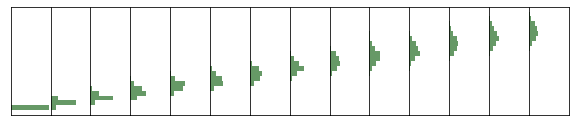

In [30]:
k = 9

d = str(t_and_c[k,0])

gmin, gmax = np.percentile(datas[d][:,0],1),np.percentile(datas[d][:,-1],99)

bin_size = b_set[k]#int(min(b_set[i],gmax - gmin + 1))

#g_edges = 10**np.linspace(math.log10(max(gmin,1)),math.log10(gmax+1),bin_size+1)
g_edges = np.linspace(gmin,gmax,bin_size+1)
    
fig = plt.figure(figsize=(10,2))
gs = fig.add_gridspec(1,datas[d].shape[1],wspace=0)
axs = gs.subplots(sharex=True, sharey=True)

#fig, axs = plt.subplots(1,10,sharey=True,figsize=(10,3))

for i in range(0,datas[d].shape[1]):
    #vals = st.poisson.rvs(gs[i],0,samples)
    
    axs[i] = plt.subplot(gs[0,i])
    
    axs[i].hist(datas[d][:,i]+1,orientation='horizontal',bins=g_edges,color='#005500',alpha=0.6)
    #axs[i].set_yscale('log')
    #axs[i].set_ylim(0,20)
    #axs[i].set_xlim(0,0.2)
    axs[i].axes.xaxis.set_visible(False)
    axs[i].axes.yaxis.set_visible(False)

#plt.savefig('channel.png',dpi=300)